In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("transfusion.data")

In [3]:
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


<h3>Exploratory Data Analysis</h3>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [6]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


<h3>Making columns names short</h3>

In [7]:
df.rename(columns={'Recency (months)':'Recency' , 'Frequency (times)':'Frequency',
                   'Monetary (c.c. blood)':'Monetary','Time (months)':'Time',
                   'whether he/she donated blood in March 2007':'Donate' },inplace=True)

In [8]:
df.head(5)

,Recency,Frequency,Monetary,Time,Donate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


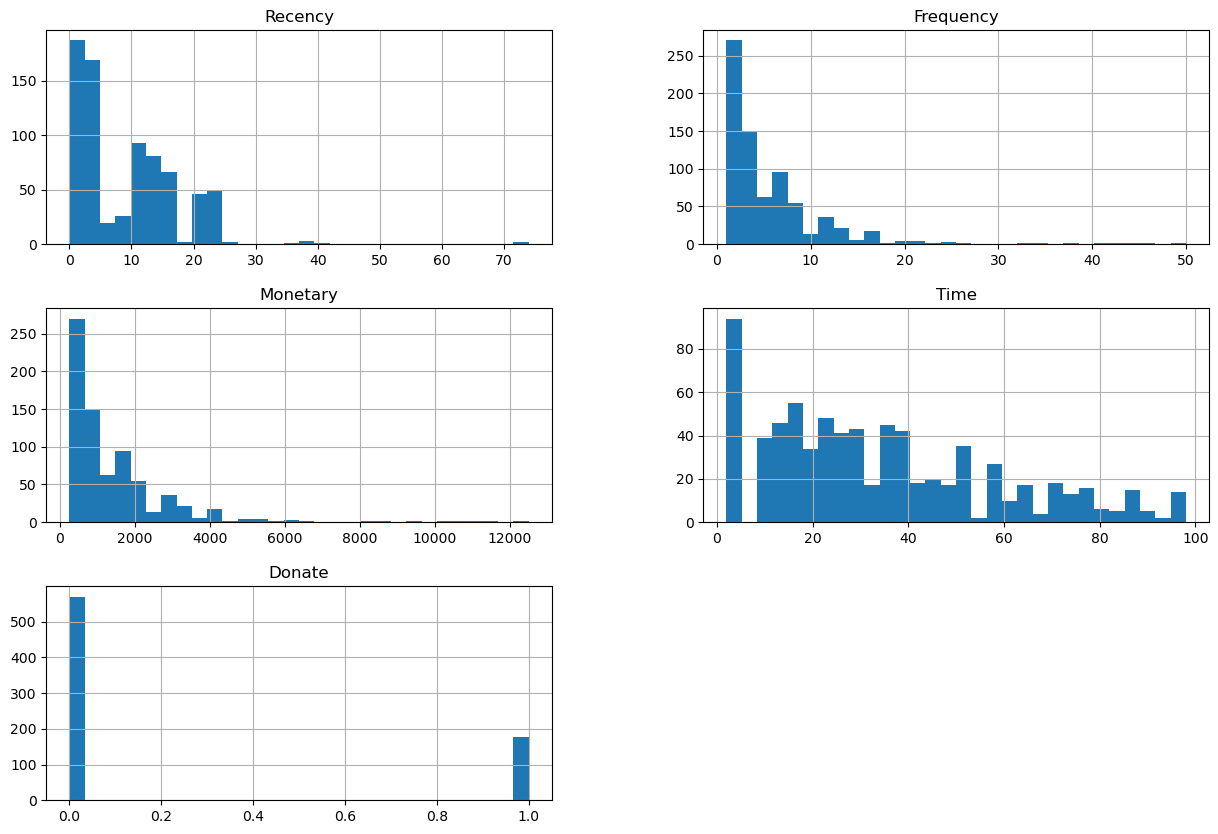

In [9]:
# Plot histograms for all features
df.hist(bins=30, figsize=(15, 10))
plt.show()

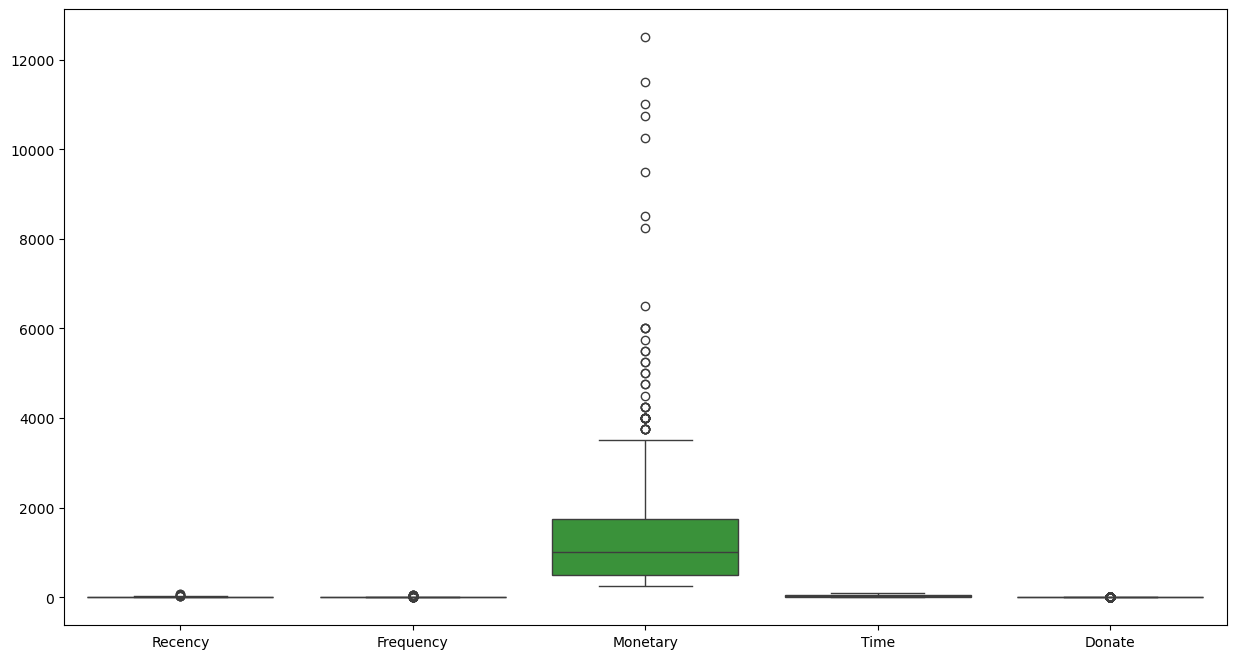

In [10]:
# Plot box plots for all features
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.show()

box plots show that Monetary has some noise in it

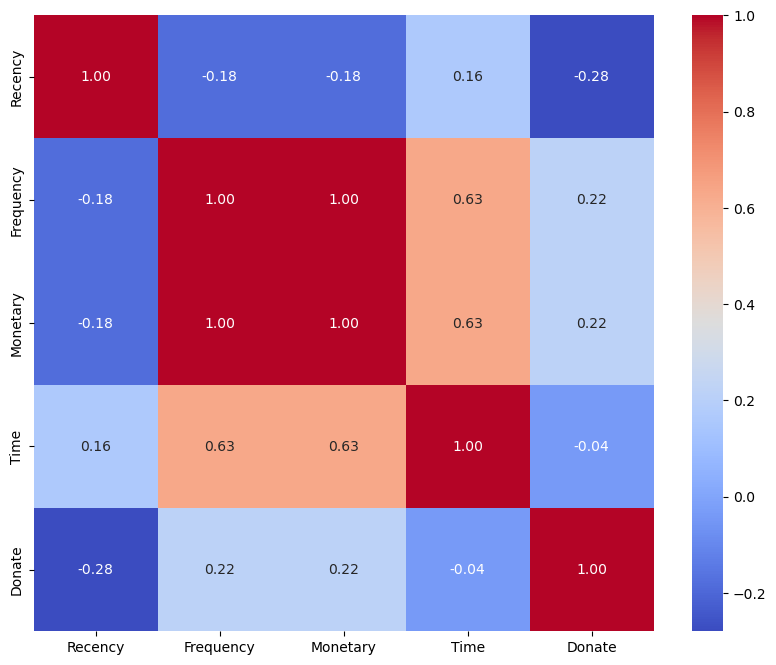

In [11]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


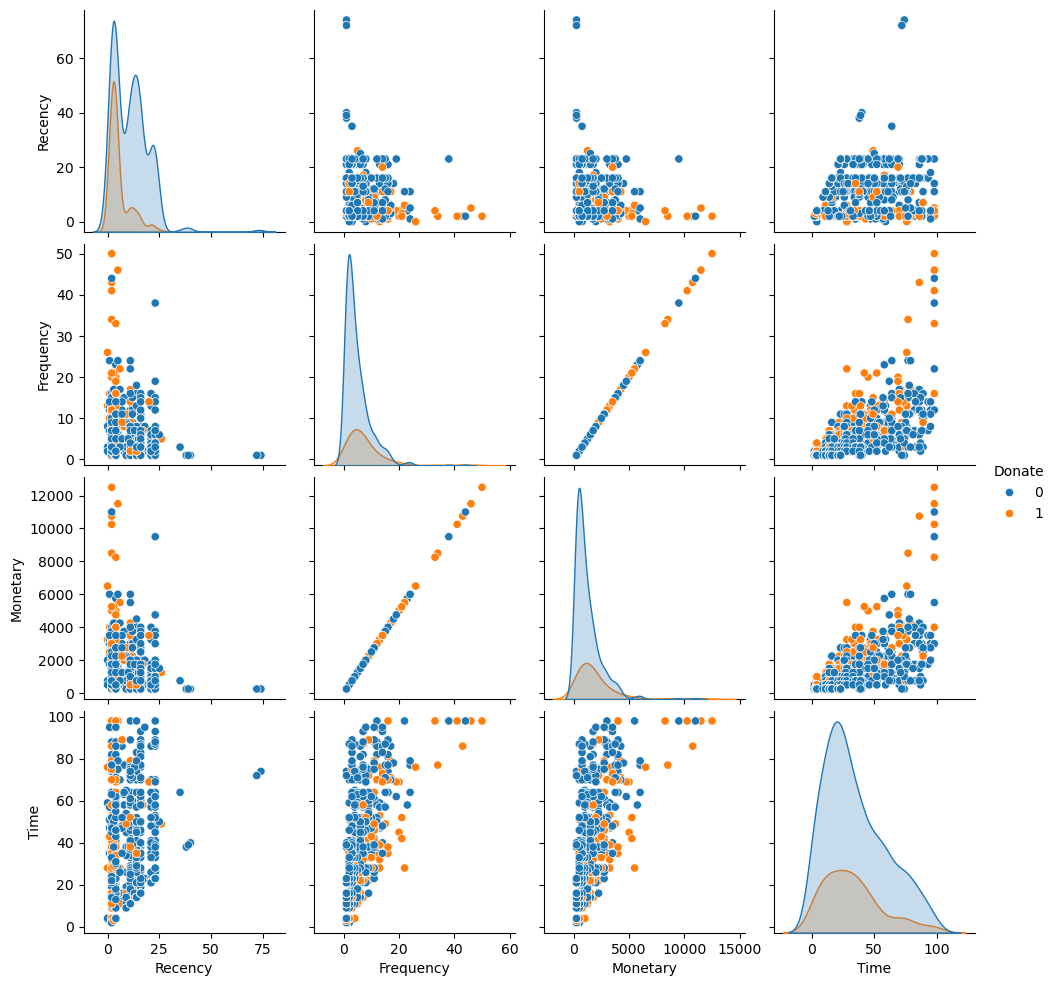

In [12]:
sns.pairplot(df, hue="Donate")
plt.show()

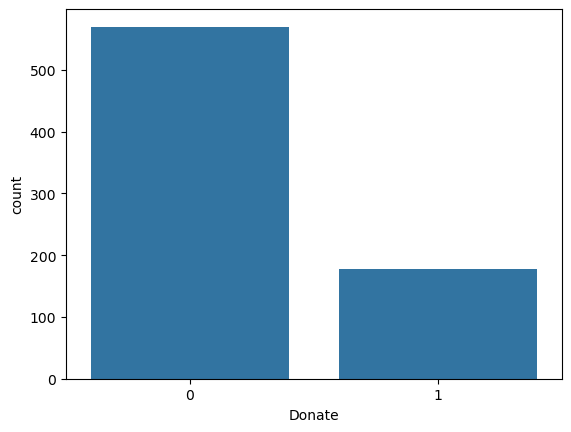

In [13]:
sns.countplot(x="Donate",data=df)
plt.show()

In [14]:
skewed_features = df.skew().sort_values(ascending=False)
print(skewed_features)


Frequency    3.211265
Monetary     3.211265
Recency      1.880464
Donate       1.233136
Time         0.749450
dtype: float64


**Frequency and Monetary** have very high skewness (0.21), indicating that these features are
right-skewed. This suggests that the majority of the data points are clustered around lower
values, with some extreme high values (outliers).<br>
**Recency** also has a significant skew (~1.88), indicating a moderate right-skew.<br>
**Time** has the lowest skewness (—0.75), so it may not need transformation.<br><br>
**Applying Logarithmic Transformation** **(for right-skewed data) :**<br>
The log transformation is effective for reducing skewness by compressing the range of values and
making the distribution more normal. Use to avoid issues with zero values.<br>
**Note:** np.log1p()' applies log(l + x)' , which ensures that values of do not cause errors.


In [15]:
df['Frequency_log'] = np.log1p(df['Frequency'])
df['Monetary_log'] = np.log1p(df['Monetary'])
df['Recency_log'] = np.log1p(df['Recency'])


In [16]:
print(df[['Frequency_log', 'Monetary_log', 'Recency_log']].skew())


Frequency_log    0.452623
Monetary_log     0.130676
Recency_log     -0.021433
dtype: float64


In [17]:
df.head()

,Recency,Frequency,Monetary,Time,Donate,Frequency_log,Monetary_log,Recency_log
0,2,50,12500,98,1,3.931826,9.433564,1.098612
1,0,13,3250,28,1,2.639057,8.086718,0.000000
2,1,16,4000,35,1,2.833213,8.294300,0.693147
3,2,20,5000,45,1,3.044522,8.517393,1.098612
4,1,24,6000,77,0,3.218876,8.699681,0.693147


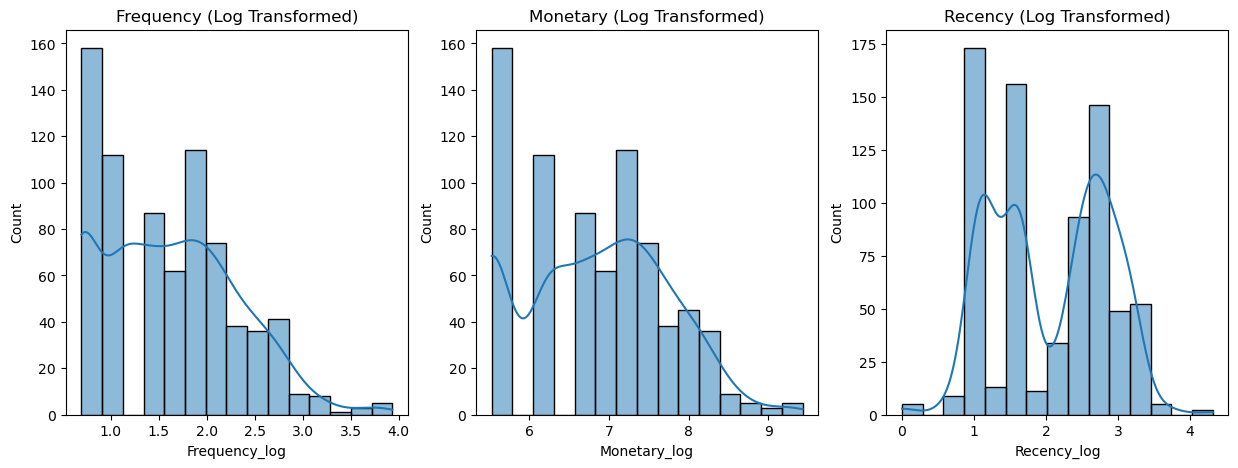

In [18]:
# Plot histograms for the transformed features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Frequency_log'], kde=True)
plt.title('Frequency (Log Transformed)')

plt.subplot(1, 3, 2)
sns.histplot(df['Monetary_log'], kde=True)
plt.title('Monetary (Log Transformed)')

plt.subplot(1, 3, 3)
sns.histplot(df['Recency_log'], kde=True)
plt.title('Recency (Log Transformed)')

plt.show()


**Donate(target variable:** its skewness (1.23) indicates a slight imbalance. This often happens with binary classification tasks where one class (e.g., donors) is much less frequent than the other (non-donors).

In [19]:
X= df[['Frequency', 'Monetary_log', 'Recency','Time']]
y= df.Donate
y.value_counts()

Donate
0    570
1    178
Name: count, dtype: int64

<h3>Training Data</h3>
## 6. Splitting transfusion into train and test datasets
<p>We'll now use <code>train_test_split()</code> method to split <code>transfusion</code> DataFrame.</p>
<p>Target incidence informed us that in our dataset <code>0</code>s appear 76% of the time. We want to keep the same structure in train and test datasets, i.e., both datasets must have 0 target incidence of 76%. This is very easy to do using the <code>train_test_split()</code> method from the <code>scikit learn</code> library - all we need to do is specify the <code>stratify</code> parameter. In our case, we'll stratify on the <code>target</code> column.</p>

In [34]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42 ,stratify=y)

y_train.value_counts()

Donate
0    456
1    142
Name: count, dtype: int64

For imbalanced classes I have tried SMOTE but it is not giving the best result so I am choosing Random Forest which is good in handling imbalanced class

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [36]:
# Predict on the test set
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

cm= confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       114
           1       0.41      0.50      0.45        36

    accuracy                           0.71       150
   macro avg       0.62      0.64      0.62       150
weighted avg       0.73      0.71      0.72       150

[[88 26]
 [18 18]]


<h3>So to improve the accuracy I am implementing Logistic Regression </h3>

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [25]:
# Predict on the test set
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       114
           1       0.61      0.31      0.41        36

    accuracy                           0.79       150
   macro avg       0.71      0.62      0.64       150
weighted avg       0.76      0.79      0.76       150

[[107   7]
 [ 25  11]]


<h3>here we have improved our accuracy with other metrics</h3>

In [27]:
from sklearn.metrics import roc_auc_score
# Calculate the ROC-AUC score
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.79


ROC-AUC Score: 0.79


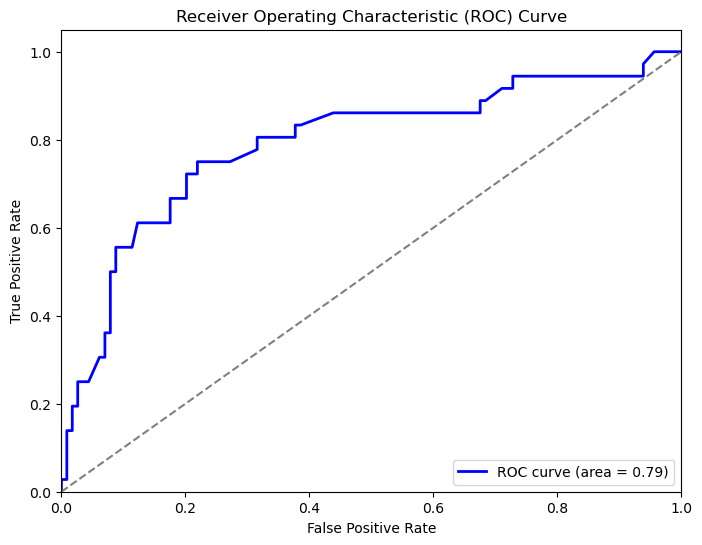

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming `y_test` is your actual labels and `y_pred_prob` is the predicted probabilities from your model
# Make sure `y_pred_prob` contains the predicted probabilities for the positive class (class 1)

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
